In [1]:
import joblib
import tensorflow as tf
import matplotlib.pyplot as plt
from support_functions import *
import numpy as np

# Triplets laten zien
In dit notebook wordt gedemonstreerd hoe de zogenaamde triplets kunnen laten zien worden.

In [2]:
# gpu dingen
limit_gpu_memory(1024)

strategy = tf.distribute.MirroredStrategy()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


## Het inladen van een model
Om niet een heel model opnieuw te trainen wordt hier een reeds getraind model ingeladen.

In [4]:
with strategy.scope():
    model = tf.keras.models.load_model('models/alpha_model')

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 512, 512, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 128)     1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 128)     147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 128)     147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 256)     295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 256)     590080

## Maken van de triplet

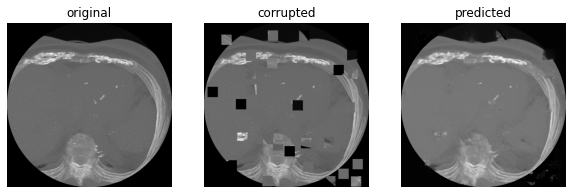

In [11]:
NUMBER_OF_SWITCHES = 15
PATCH_SIZE = 32


# inladen scan
image = joblib.load('scans/scans_max_normalised_float32.joblib')[0]
# scan corrumperen
image_corrupt = corrupt_image(image, NUMBER_OF_SWITCHES, PATCH_SIZE)
# dimensies aanpassen zodat het model kan vorspellen
image_corrupt_expanded = np.resize(image_corrupt, (1, image_corrupt.shape[0], image_corrupt.shape[1], 1))
# voorspelling maken
image_predict = model.predict(image_corrupt_expanded)[0]


fig = plt.figure(figsize=(10, 30))

f = plt.subplot(1, 3, 1)
plt.title('original')
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray)
f = plt.subplot(1, 3, 2)
plt.title('corrupted')
plt.axis('off')
plt.imshow(image_corrupt, cmap=plt.cm.gray)
f = plt.subplot(1, 3, 3)
plt.title('predicted')
plt.axis('off')
plt.imshow(image_predict, cmap=plt.cm.gray)

Deze code is geïntegreerd in een callback tijdens het trainen van het model. Zo is het mogelijk om tijdens het trainen een idee te krijgen hoe goed het model bezig is.